## ROC Plot ##

In [4]:
# Import required modules
import sys
from pathlib import Path

In [5]:
# import project root into modules
project_root = str(Path.cwd().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

In [6]:
from src.analysis import etc_plot
from src.utilities import load_and_preprocess_jobs
from src.config import enum_constants

# Automatically reload modules before executing code
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.analysis.etc_plot, src.config.enum_constants, src.analysis.efficiency_analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# load jobs df
loaded_df = load_and_preprocess_jobs(db_path="../data/slurm_data.db")

Connected to ../data/slurm_data.db
Fetched and saved partition_info.json from remote URL.
[Preprocessing] Running with new database format: GPU types as dictionary.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/utilities/load_and_preprocess_jobs.py:90: UserWarning: 6545 duplicate JobIDs detected. Keeping only the latest entry for each JobID.
  processed_data = preprocess_data(jobs_df, apply_filter=False)


Found 42 records with errors. Reporting them to a summary file /Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/data/preprocessing/preprocessing_errors.log.
Processing error log file already exists. Overwriting preprocessing_errors.log
Disconnected from ../data/slurm_data.db


In [8]:
# initilize the ROCVisualizer instance
roc_instance = etc_plot.ETCVisualizer(jobs_df=loaded_df)


# filter to drop invalid entries (GPUType is null although we filtered out all CPU-only jobs)
invalid_mask = (loaded_df["GPUType"].isna())
filtered_df = loaded_df[~invalid_mask].copy()
# calcualted dataframe with metrics
roc_instance.calculate_all_efficiency_metrics(filtered_df)



{'jobs_with_efficiency_metrics':            JobID  ArrayJobID  ArrayID                      JobName  IsArray  \
 273941  41012953        <NA>       -1                       job.sh    False   
 273940  41012951        <NA>       -1                       job.sh    False   
 273939  41012949        <NA>       -1                       job.sh    False   
 273938  41012881        <NA>       -1                       job.sh    False   
 273937  41012877        <NA>       -1                       job.sh    False   
 ...          ...         ...      ...                          ...      ...   
 148597  23946071        <NA>       -1                       sbatch    False   
 148784  23946070        <NA>       -1                       sbatch    False   
 148783  23946069        <NA>       -1                       sbatch    False   
 207064  23890375        <NA>       -1  sys/dashboard/sys/bc_vscode    False   
 207063  23864844        <NA>       -1                         bash    False   
 
      

#### Job Plots ####

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/etc_plot.py:596: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ETC plot (Jobs) for proportion of vram_hours by threshold alloc_vram_efficiency\n Total vram_hours: 2.6e+08 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

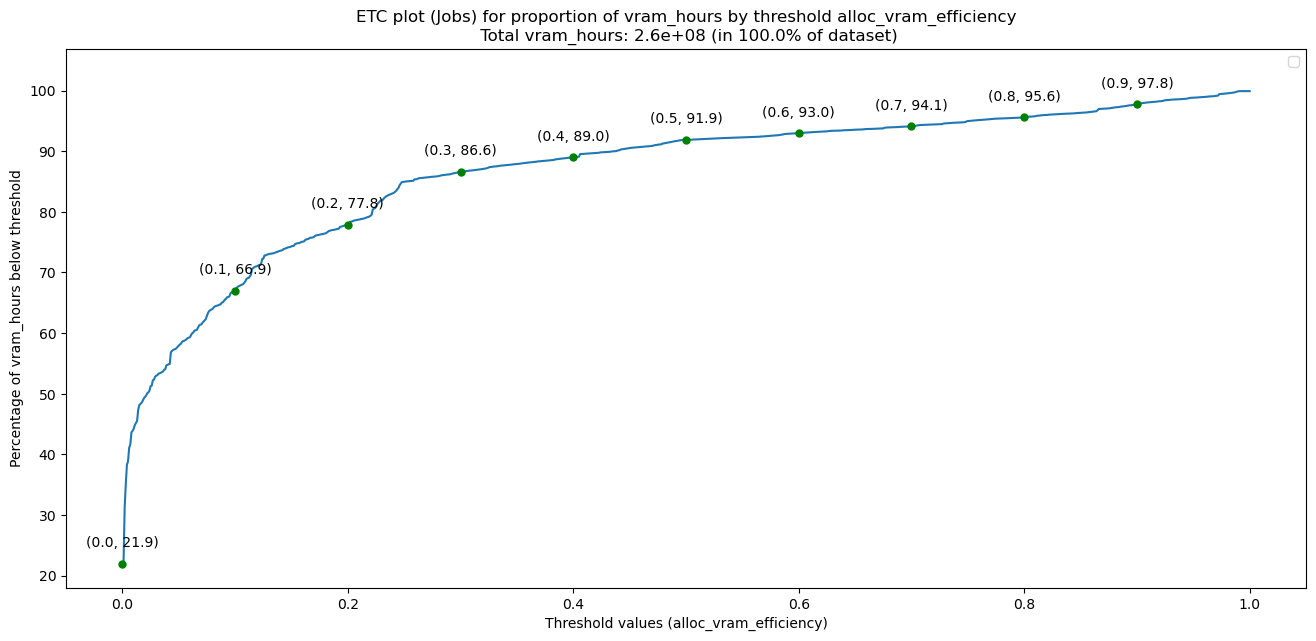

In [9]:
type = enum_constants.ROCPlotTypes.JOB
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

roc_instance.plot_roc(plot_type=type, 
                    threshold_metric=threshold_metric,
                    min_threshold=0, 
                    max_threshold=1.0,
                    threshold_step=0.001,
                    proportion_metric=proportion_metric)

#### Inspect Job plots for vram_constraint_efficiency with null set to 11gb or not ####

Filtered out 404 invalid records based on expected_value_vram_constraint_efficiency column.


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ETC plot (Users) for proportion of User by threshold expected_value_vram_constraint_efficiency\n Total User: 618.0 (in 60.5% of aggregated User dataset)'}, xlabel='Threshold values (expected_value_vram_constraint_efficiency)', ylabel='Percentage of User below threshold'>])

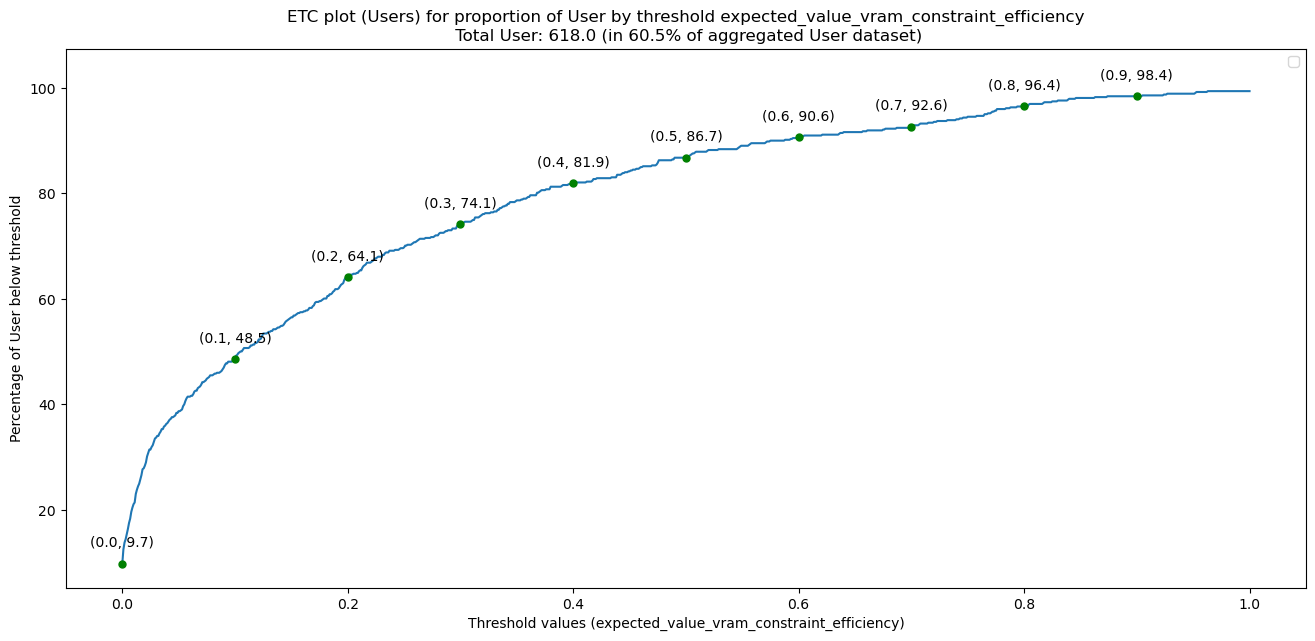

In [10]:
type = enum_constants.ROCPlotTypes.USER
threshold_metric = enum_constants.UserEfficiencyMetricsEnum.EXPECTED_VALUE_VRAM_CONSTRAINTS_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USERS

roc_instance.plot_roc(plot_type=type, 
                    threshold_metric=threshold_metric,
                    min_threshold=0, 
                    max_threshold=1.0,
                    threshold_step=0.001,
                    proportion_metric=proportion_metric)

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/etc_plot.py:596: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ETC plot (Users) for proportion of User by threshold expected_value_vram_constraint_efficiency\n Total User: 1022 (in 100.0% of aggregated User dataset)'}, xlabel='Threshold values (expected_value_vram_constraint_efficiency)', ylabel='Percentage of User below threshold'>])

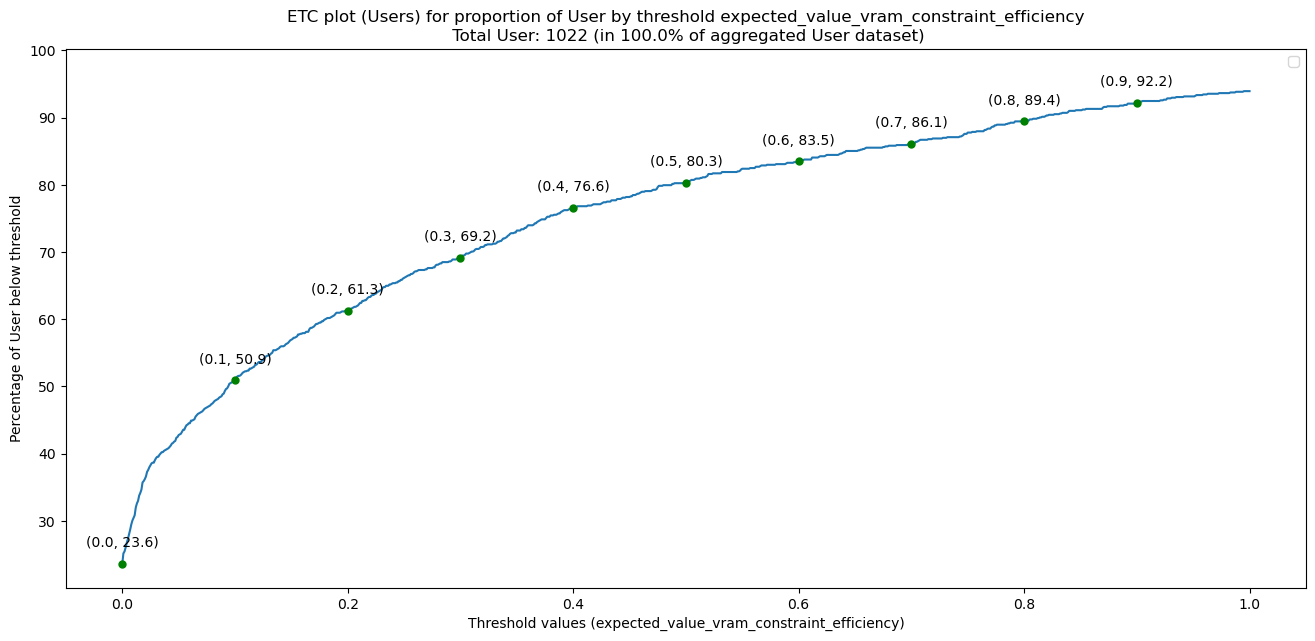

In [11]:
default_vram_constraint_df = filtered_df.copy()
default_vram_constraint_df.loc[:, "vram_constraint"] = default_vram_constraint_df["vram_constraint"].fillna(11.0)
roc_new_instance = etc_plot.ETCVisualizer(default_vram_constraint_df) 
roc_new_instance.calculate_all_efficiency_metrics(default_vram_constraint_df)

type = enum_constants.ROCPlotTypes.USER
threshold_metric = enum_constants.UserEfficiencyMetricsEnum.EXPECTED_VALUE_VRAM_CONSTRAINTS_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USERS

roc_new_instance.plot_roc(plot_type=type, 
                    threshold_metric=threshold_metric,
                    min_threshold=0, 
                    max_threshold=1.0,
                    threshold_step=0.001,
                    proportion_metric=proportion_metric)


#### User plots ####

(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ETC plot (Users) for proportion of User by threshold expected_value_alloc_vram_efficiency\n Total User: 1022 (in 100.0% of aggregated User dataset)'}, xlabel='Threshold values (expected_value_alloc_vram_efficiency)', ylabel='Percentage of User below threshold'>])

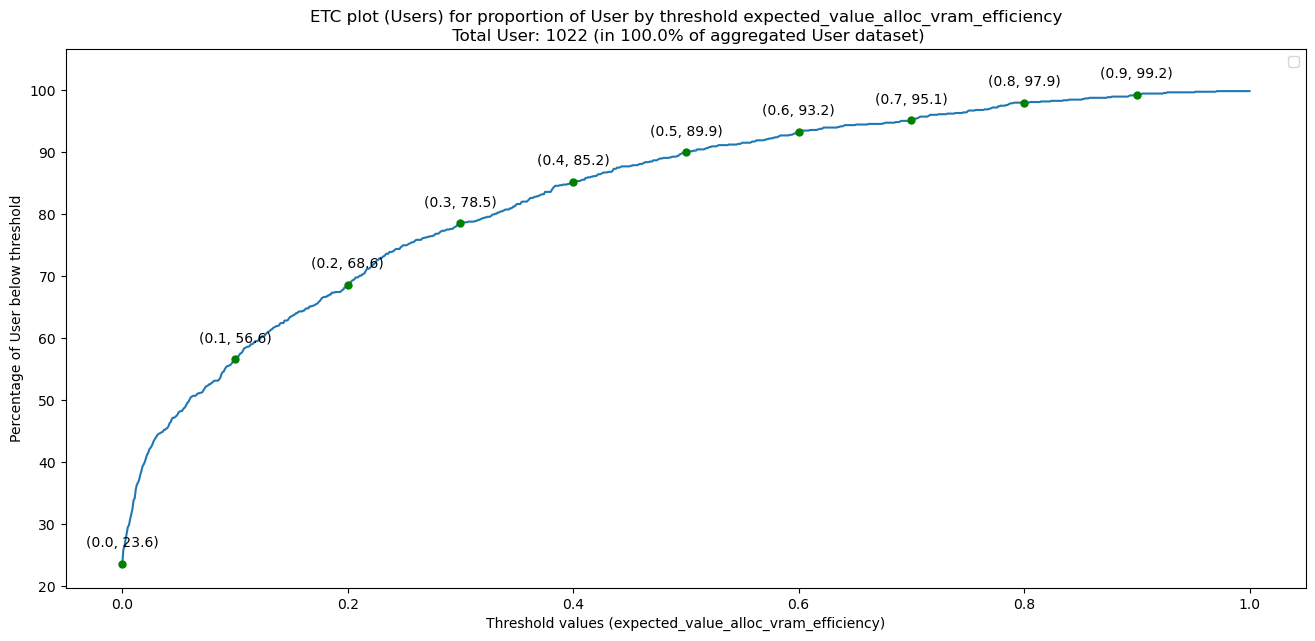

In [12]:
type = enum_constants.ROCPlotTypes.USER
threshold_metric = enum_constants.UserEfficiencyMetricsEnum.EXPECTED_VALUE_ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.USERS

roc_instance.plot_roc(plot_type=type, 
                    threshold_metric=threshold_metric,
                    min_threshold=0, 
                    max_threshold=1.0,
                    threshold_step=0.001,
                    proportion_metric=proportion_metric)